In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "log_evaluations.xlsx"  # Replace with your actual file path
df = pd.read_excel("log_evaluations.xlsx")

In [25]:
df.head(1)

,Model,Evaluator Model,Random Seed,Number of Samples,Total Time,Validation Time,Validation Scores,Validation Results,Test Time,Test Scores,...,Test Results - LabeledFewShot,Optimization Time - BootstrapFewShot,Number of candidate programs - BootstrapFewShot,Max Bootstrapped Demos - BootstrapFewShot,Validation Time - BootstrapFewShot,Validation Scores - BootstrapFewShot,Validation Results - BootstrapFewShot,Test Time - BootstrapFewShot,Test Scores - BootstrapFewShot,Test Results - BootstrapFewShot
0,llama-3-8b-bnb-4bit-synthetic_text_to_sql-lora...,llama3:70b,1399,20,623.6,45.0983,25.0,[(Example({'sql_prompt': 'What is the total re...,50.32,25.0,...,[(Example({'sql_prompt': 'Show the percentage ...,366.47,2,2,35.93,25.0,[(Example({'sql_prompt': 'What is the total re...,51.33,12.5,[(Example({'sql_prompt': 'Show the percentage ...


In [26]:
# sort the data by model name
df = df.sort_values(by='Model')

In [27]:
# Function to insert line breaks in model names and make all letters lowercase
def process_model_names(text, max_length=20):
    text = text.lower()
    return '\n'.join([text[i:i+max_length] for i in range(0, len(text), max_length)])

# Apply the transformations to the 'Model' column
df['Model'] = df['Model'].apply(process_model_names)

# Sort the DataFrame by the modified 'Model' column
df = df.sort_values(by='Model')

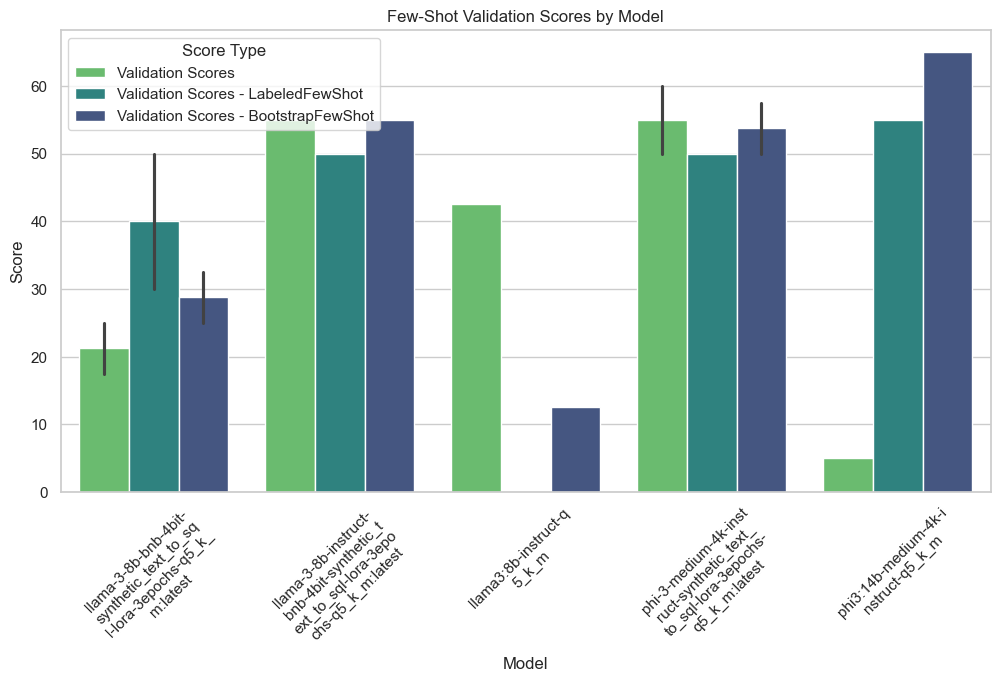

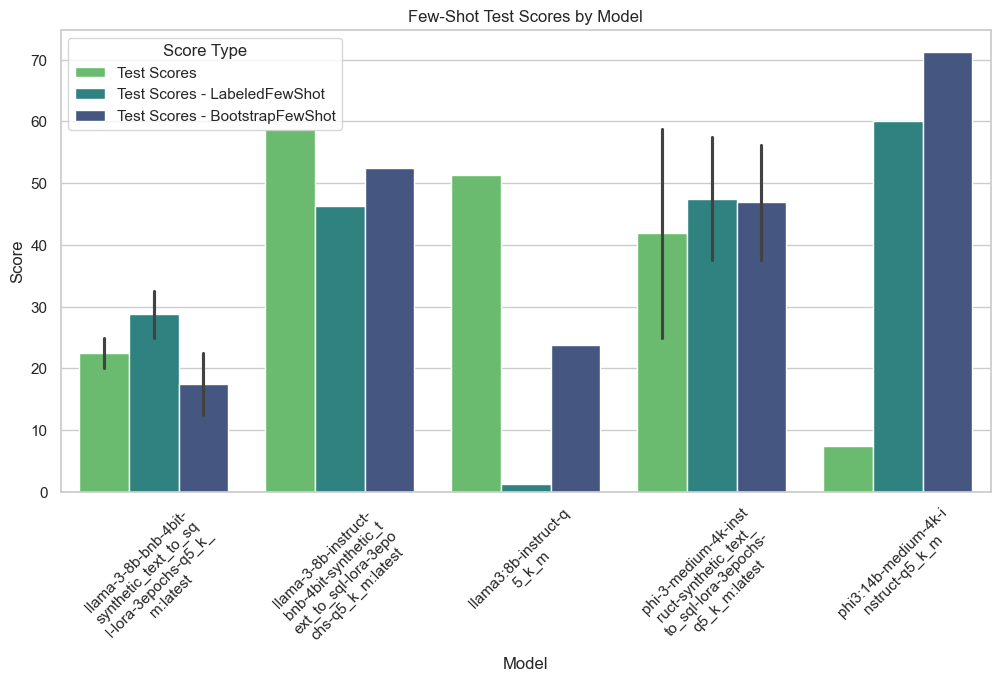

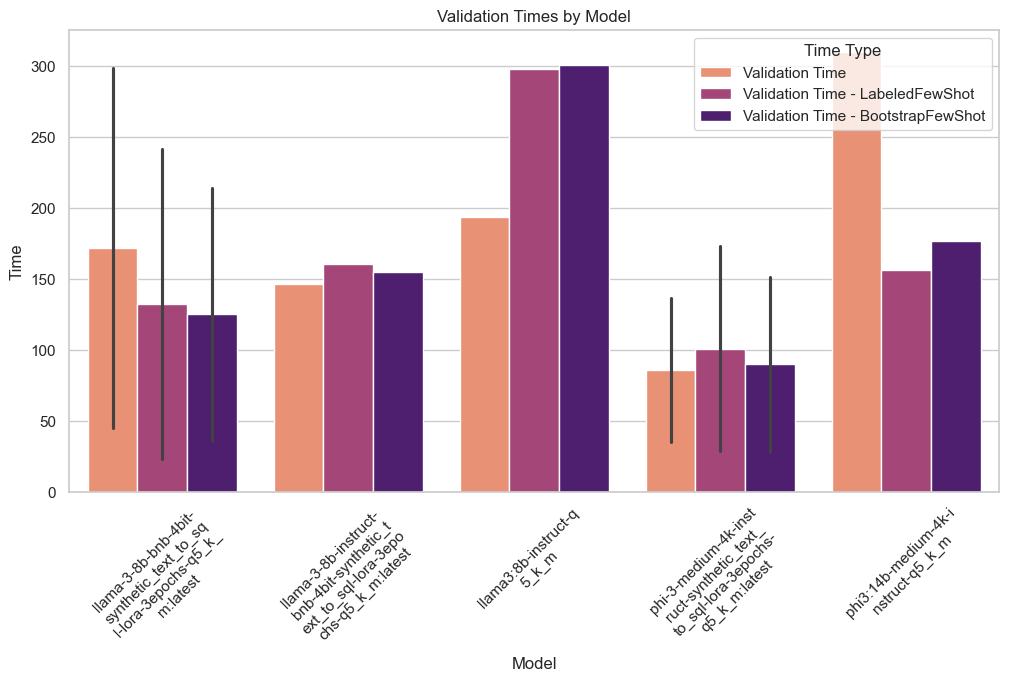

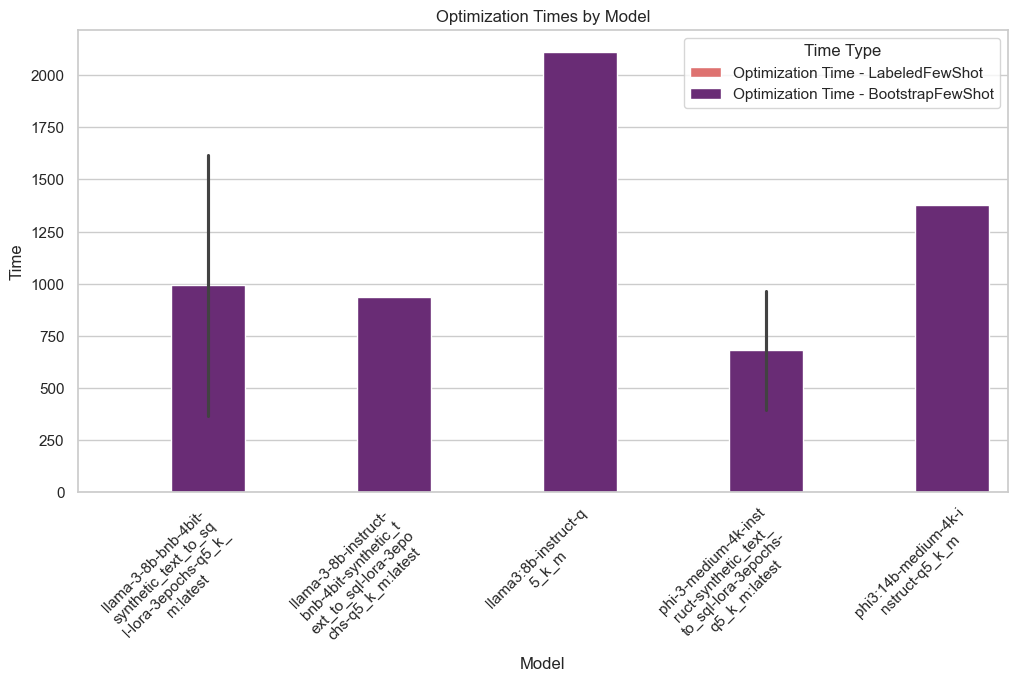

In [34]:
# Set seaborn style for the plots
sns.set(style='whitegrid')

# Function to create grouped bar plot for scores
def plot_grouped_scores(df, score_columns, title):
    melted_df = df.melt(id_vars=['Model'], value_vars=score_columns, var_name='Score Type', value_name='Score')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Score', hue='Score Type', data=melted_df, palette='viridis_r')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Function to create grouped bar plot for times
def plot_grouped_times(df, time_columns, title):
    melted_df = df.melt(id_vars=['Model'], value_vars=time_columns, var_name='Time Type', value_name='Time')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Time', hue='Time Type', data=melted_df, palette='magma_r')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


# # Plot grouped validation and test scores
# plot_grouped_scores(df, ['Validation Scores', 'Test Scores'], 'Validation and Test Scores by Model')

# Plot grouped labeled few-shot validation scores
plot_grouped_scores(df, ['Validation Scores', 'Validation Scores - LabeledFewShot', 'Validation Scores - BootstrapFewShot'], 'Few-Shot Validation Scores by Model')

# Plot grouped labeled bootstrap few-shot validation scores
plot_grouped_scores(df, ['Test Scores', 'Test Scores - LabeledFewShot', 'Test Scores - BootstrapFewShot'], 'Few-Shot Test Scores by Model')

# Plot grouped validation times
plot_grouped_times(df, ['Validation Time', 'Validation Time - LabeledFewShot', 'Validation Time - BootstrapFewShot'], 'Validation Times by Model')

# Plot grouped test times
plot_grouped_times(df, ['Test Time', 'Test Time - LabeledFewShot', 'Test Time - BootstrapFewShot'], 'Test Times by Model')


# Plot grouped optimization times
plot_grouped_times(df, ['Optimization Time - LabeledFewShot', 'Optimization Time - BootstrapFewShot'], 'Optimization Times by Model')

C:\Users\Felix\AppData\Local\Temp\ipykernel_2368\3685858586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Number of Samples', data=df, palette='coolwarm')


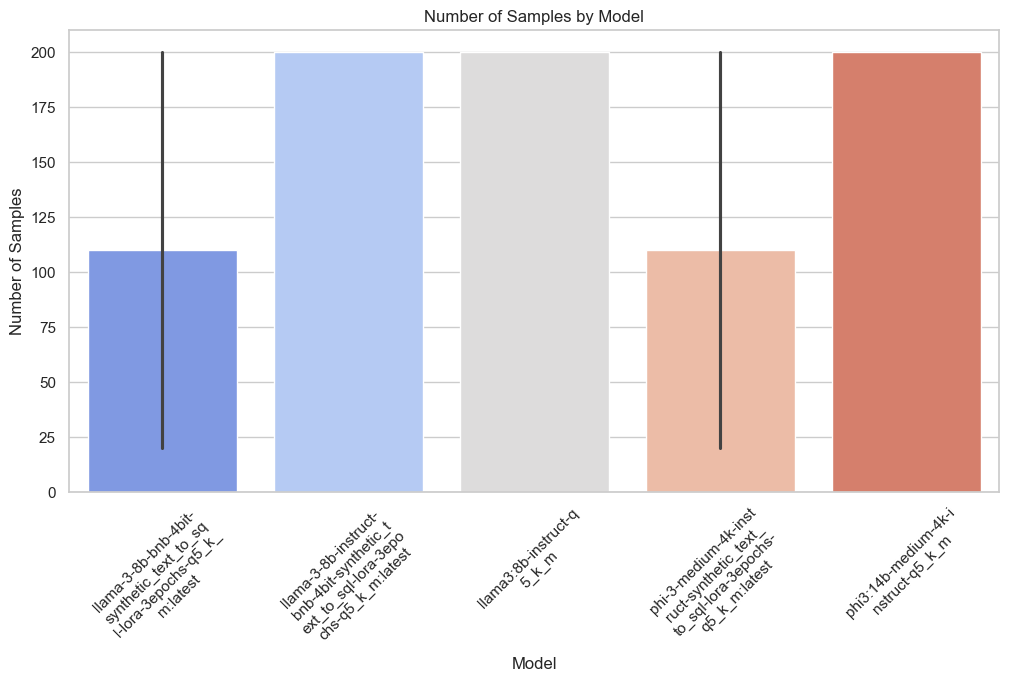

C:\Users\Felix\AppData\Local\Temp\ipykernel_2368\3685858586.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Random Seed', data=df, palette='tab10')


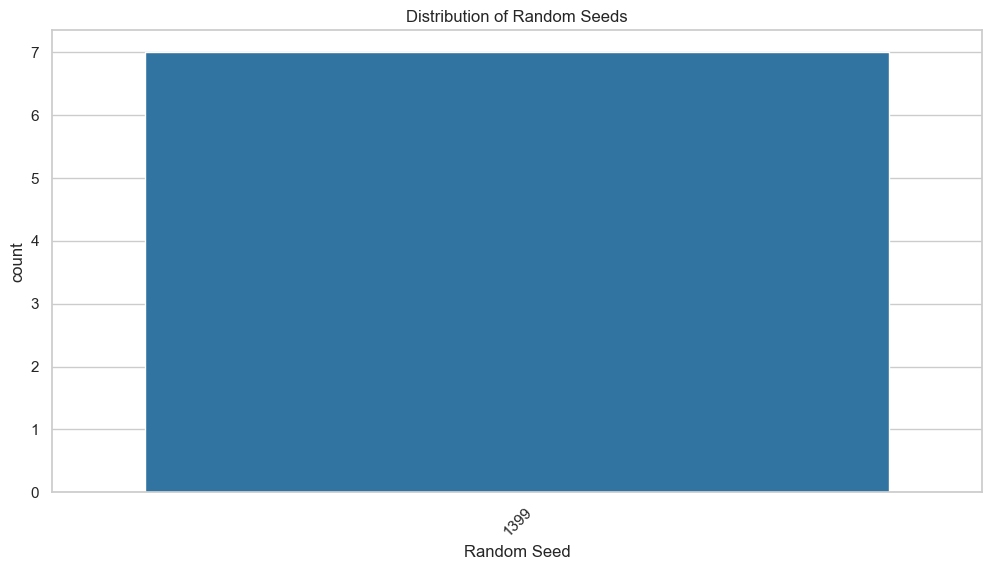

C:\Users\Felix\AppData\Local\Temp\ipykernel_2368\3685858586.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Number of candidate programs - LabeledFewShot', data=df, palette='spring', label='LabeledFewShot')
C:\Users\Felix\AppData\Local\Temp\ipykernel_2368\3685858586.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Number of candidate programs - BootstrapFewShot', data=df, palette='summer', label='BootstrapFewShot')


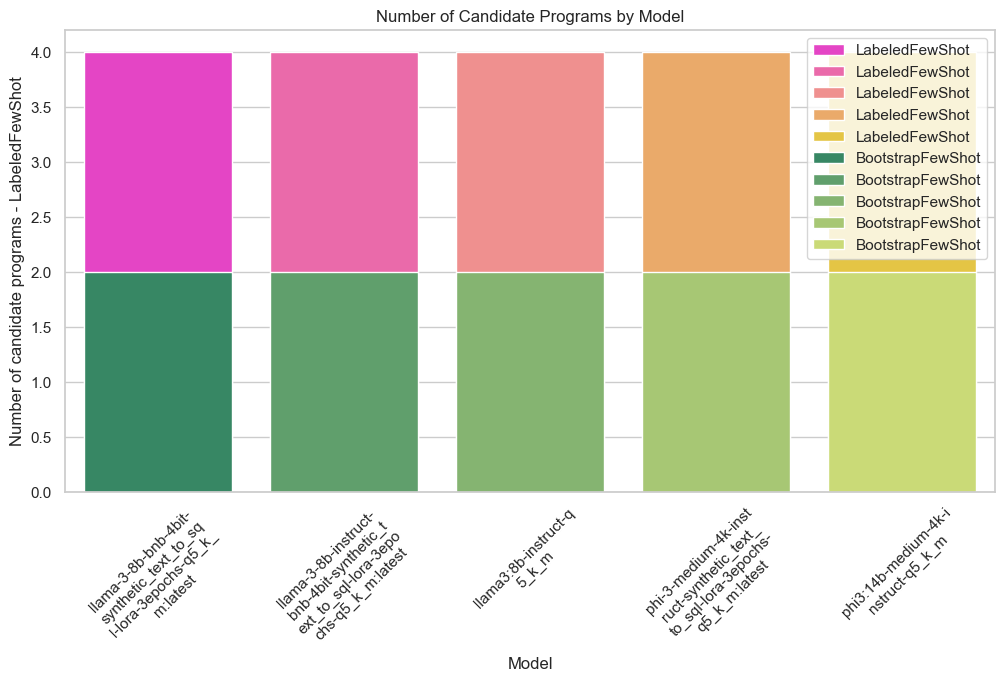

In [29]:
# Additional functions for further analysis

# Function to plot number of samples by model
def plot_samples(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Number of Samples', data=df, palette='coolwarm')
    plt.title('Number of Samples by Model')
    plt.xticks(rotation=45)
    plt.show()

# Function to plot random seed distribution
def plot_random_seed(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Random Seed', data=df, palette='tab10')
    plt.title('Distribution of Random Seeds')
    plt.xticks(rotation=45)
    plt.show()

# Plot number of samples and random seed distribution
plot_samples(df)
plot_random_seed(df)

# Function to plot comparison of candidate programs in FewShot methods
def plot_candidate_programs(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Number of candidate programs - LabeledFewShot', data=df, palette='spring', label='LabeledFewShot')
    sns.barplot(x='Model', y='Number of candidate programs - BootstrapFewShot', data=df, palette='summer', label='BootstrapFewShot')
    plt.title('Number of Candidate Programs by Model')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Plot candidate programs comparison
plot_candidate_programs(df)